In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
path =r"C:\Users\ADMIN\Downloads\insurance (1).csv"

In [4]:
df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Getting number of (rows , columns)
df.shape

(1338, 7)

In [7]:
#Getting columns with datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Checking missing values

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#checking duplicate
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
#Droping the Duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(1337, 7)

#Univariate Analysis
**non-viz**:
(Min ,Max ,Mean ,Median ,Std)
**Viz**:
plot of Distribution - Distribution
plot of BoxPlot - Outliers

##Analysis on Age Feature

In [14]:
#Non_Visualization analysis
print(df['age'].min())
print(df['age'].max())
print(df['age'].mean())
print(df['age'].median())
print(df['age'].std())

18
64
39.222139117427076
39.0
14.044332734156422


--From above age column Look like mean and median are colse, there may be are very few or no outlier--.

<Axes: ylabel='Density'>

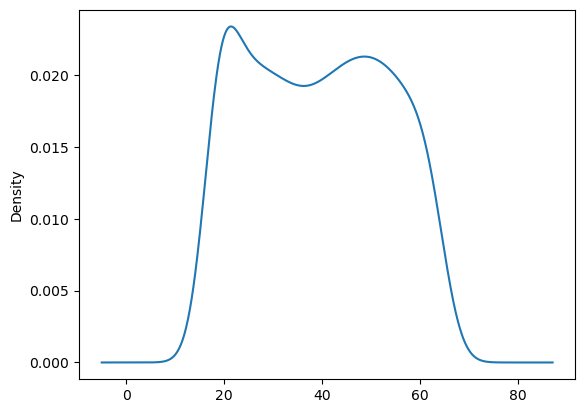

In [15]:
# Distribution Of age Feature using kde plot
df['age'].plot(kind='kde')

<Axes: >

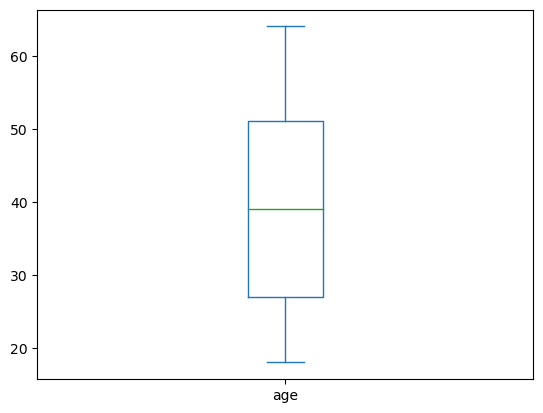

In [16]:
# Detecting the outliers using boxplot
df['age'].plot(kind='box')

From above Age Feature as no outlier

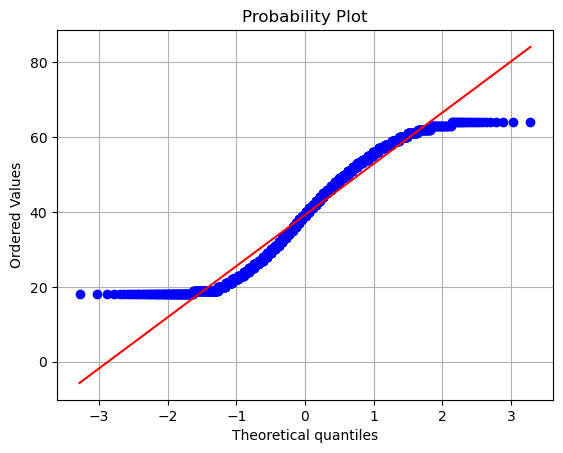

In [17]:
#checking for normal distribution using QQ-plot
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df['age'],dist='norm',plot=plt)
plt.grid()

-- By the above QQ-plot,the age feature is not normally distributed.

## Analysing bmi Feature

In [18]:
# Non-Visualization  Analysis
print(df['bmi'].min())
print(df['bmi'].max())
print(df['bmi'].mean())
print(df['bmi'].median())
print(df['bmi'].std())

15.96
53.13
30.66345175766642
30.4
6.100468409615801


--From above age column Look like mean and median are colse, there may be are very few or no outlier--.

<Axes: ylabel='Density'>

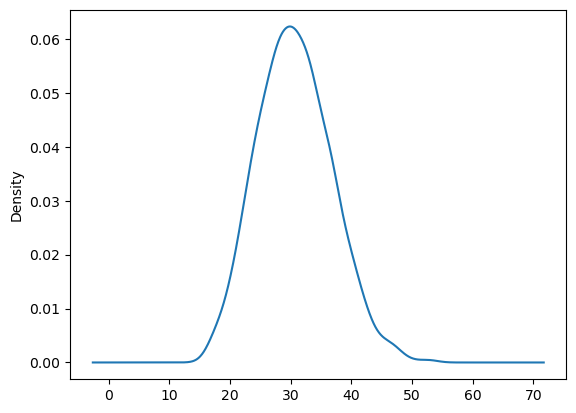

In [19]:
#checking the distribution for bmi feature using kde plot
df['bmi'].plot(kind='kde')

<Axes: >

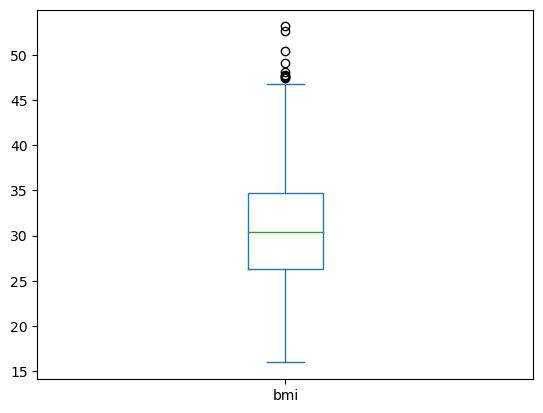

In [20]:
# checking the outliers using boxplot
df['bmi'].plot(kind='box')

In [ ]:
df['bmi',""].plot(kind='box')

-- There are some outliers in bmi feature.

#Outlier Treament
Using 1.5 IQR rule

In [21]:
q3=df['bmi'].quantile(0.75)
q1=df['bmi'].quantile(0.25)
iqr=q3-q1
print(iqr)
lower=q1-1.5*(iqr)
print(lower)
upper=q3+1.5*(iqr)
print(upper)

8.410000000000004
13.674999999999994
47.31500000000001


In [22]:
df_clean=df[(df['bmi']>lower) & (df['bmi']<upper)]

In [23]:
#shape of Data Frame After treating outliers
print('After Treating Outliers:',df_clean.shape)

After Treating Outliers: (1328, 7)


<Axes: ylabel='Density'>

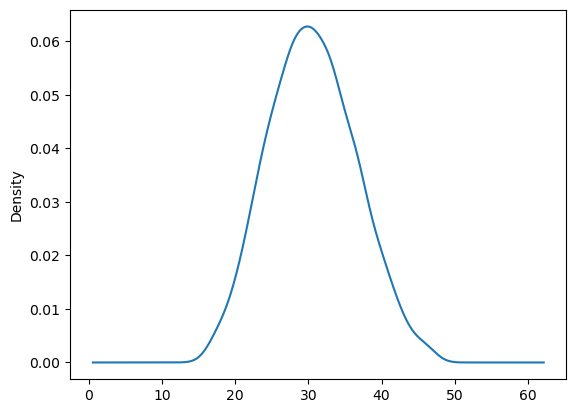

In [24]:
#checking the Distribution of bmi feature using kde after treating outlier
df_clean['bmi'].plot(kind='kde')

<Axes: >

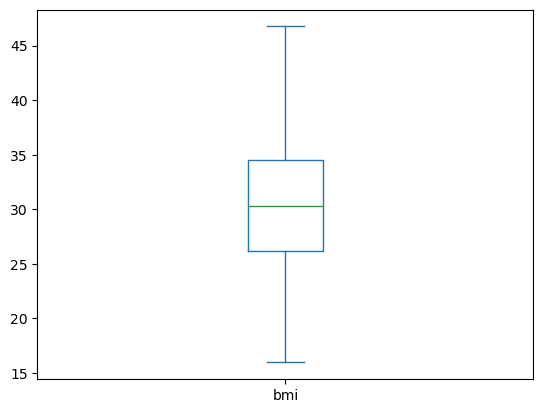

In [25]:
#Display the boxplot plot after outlier treatment
df_clean['bmi'].plot(kind='box')

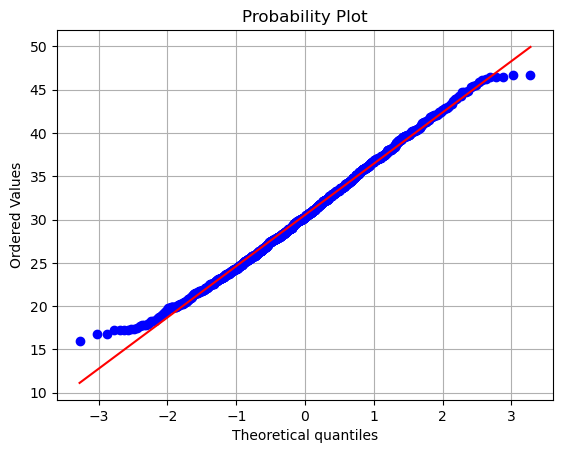

In [26]:
# Checking normal distribution for df_clean using QQ plot
stats.probplot(df_clean['bmi'],dist='norm',plot=plt)
plt.grid()

By above QQ-plot the bmi feature is not normally distributed.

## Analysing children feature

In [27]:
# Non-visualization analysis
print(df_clean['children'].min())
print(df_clean['children'].max())
print(df_clean['children'].mean())
print(df_clean['children'].median())
print(df_clean['children'].std())

0
5
1.0971385542168675
1.0
1.2080080468379986


<Axes: ylabel='Density'>

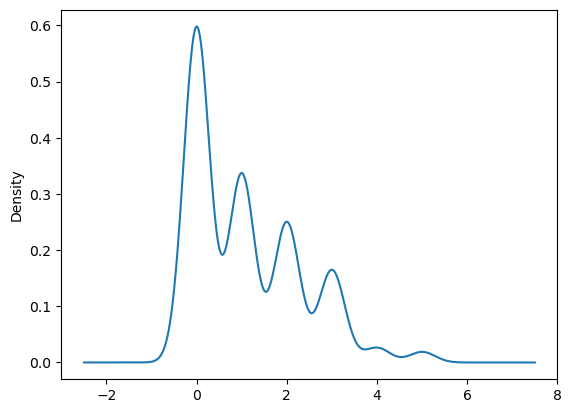

In [28]:
# Distribution Of children Feature using kde plot
df_clean['children'].plot(kind='kde')

<Axes: >

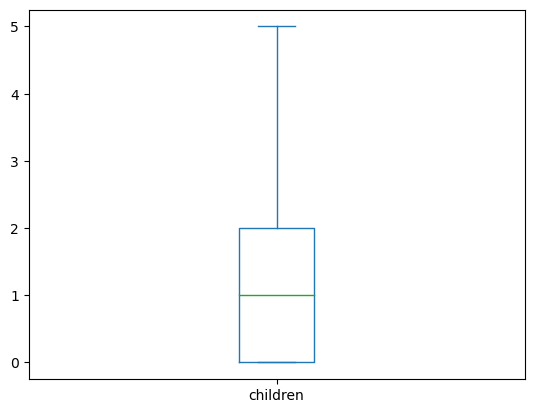

In [29]:
# Detecting outliers using boxplot
df_clean['children'].plot(kind='box')

From above graph, There is no outliers in children feature

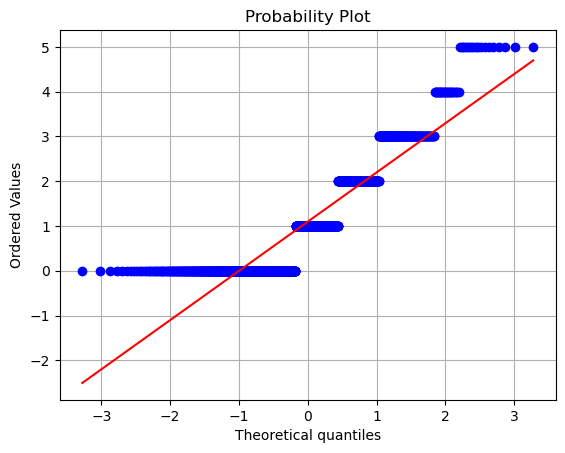

In [30]:
# Checking normal distribution  using QQ plot
stats.probplot(df_clean['children'],dist='norm',plot=plt)
plt.grid()

By above QQ-plot the children feature is not normally distributed

## Analysing charges feature

In [31]:
# Non-visualization analysis
print(df_clean['charges'].min())
print(df_clean['charges'].max())
print(df_clean['charges'].mean())
print(df_clean['charges'].median())
print(df_clean['charges'].std())

1121.8739
62592.87309
13221.047809826054
9369.61575
11997.547468296947


--From above charges column Look like mean and median are not colse, there are outlier..

<Axes: ylabel='Density'>

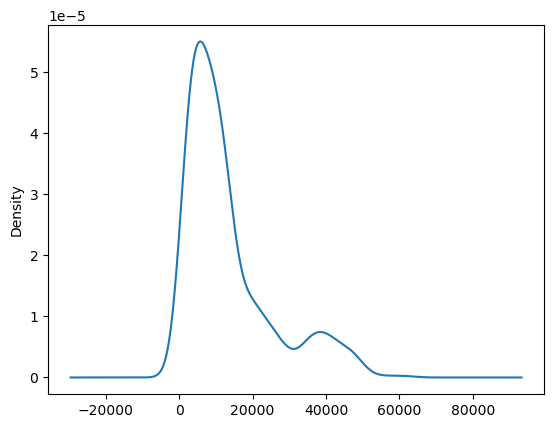

In [32]:
#checking the Distribution Of charges Feature using kde plot
df_clean['charges'].plot(kind='kde')

-- As there are more Outliers, The distribution of charges feature is seen like Pareto distribution.

<Axes: >

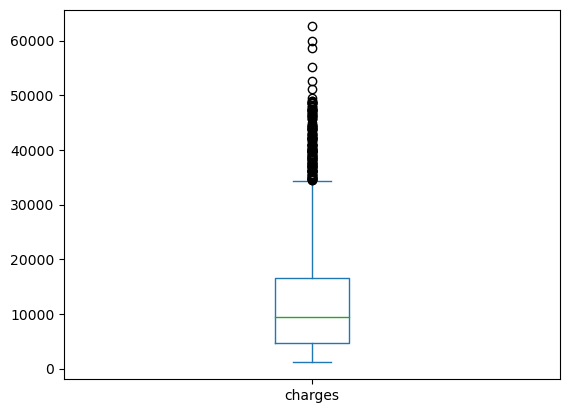

In [33]:
# Detecting outliers using boxplot
df_clean['charges'].plot(kind='box')

-- There are more Outliers.But,Any Outlier treatment won't make sense as df['charges'] is the target variable.

((array([-3.2784945 , -3.01934853, -2.87511532, ...,  2.87511532,
          3.01934853,  3.2784945 ]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 58571.07448,
         60021.39897, 62592.87309])),
 (10862.323689812521, 13221.047809826056, 0.9037579597966884))

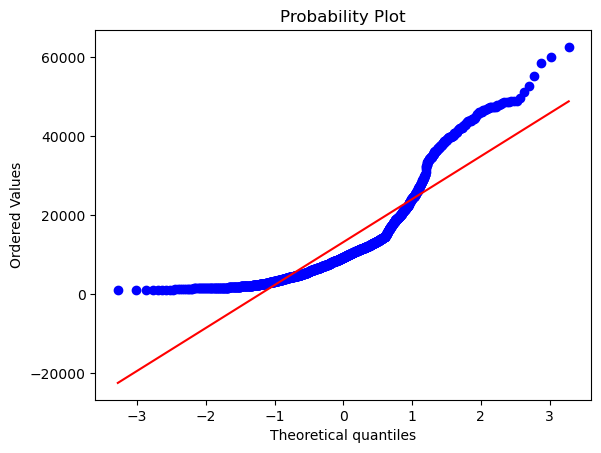

In [34]:
# Checking for normality using QQ plot
stats.probplot(df_clean['charges'],dist='norm',plot=plt)

-- As charges is the target variable outliers cannot be treated

#Analysis sex Feature

In [35]:
# getting value_counts()
df_clean['sex'].value_counts()

male      669
female    659
Name: sex, dtype: int64

In [36]:
# getting value_counts() by normalization
df_clean['sex'].value_counts(normalize = True)

male      0.503765
female    0.496235
Name: sex, dtype: float64

<Axes: >

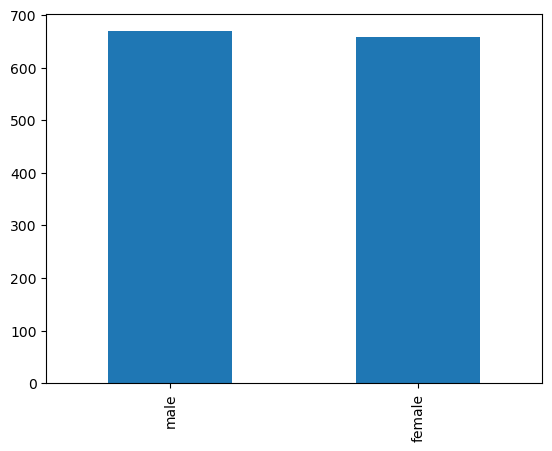

In [37]:
# Plotting barplot for sex feature
df_clean['sex'].value_counts().plot(kind = 'bar')

## Analysing region Feature - Categorical

In [ ]:
df_clean['region'].value_counts()

southeast    357
southwest    324
northwest    324
northeast    323
Name: region, dtype: int64

In [ ]:
#by normalization
df_clean['region'].value_counts(normalize= True)

southeast    0.268825
southwest    0.243976
northwest    0.243976
northeast    0.243223
Name: region, dtype: float64

<Axes: >

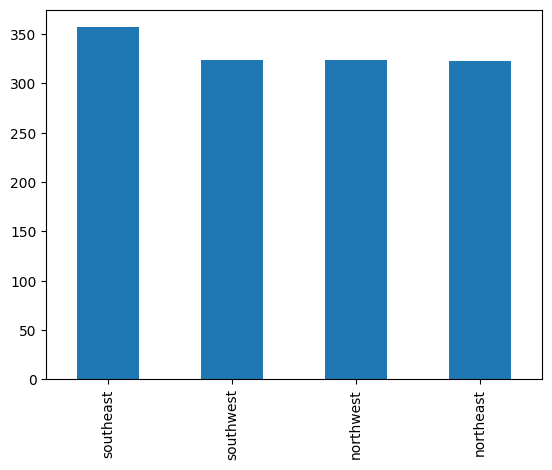

In [ ]:
df_clean['region'].value_counts().plot(kind = 'bar')

## Analysing smoker Feature - Categorical

In [ ]:
df_clean['smoker'].value_counts()

no     1057
yes     271
Name: smoker, dtype: int64

In [ ]:
df_clean['smoker'].value_counts(normalize=True)

no     0.795934
yes    0.204066
Name: smoker, dtype: float64

<Axes: >

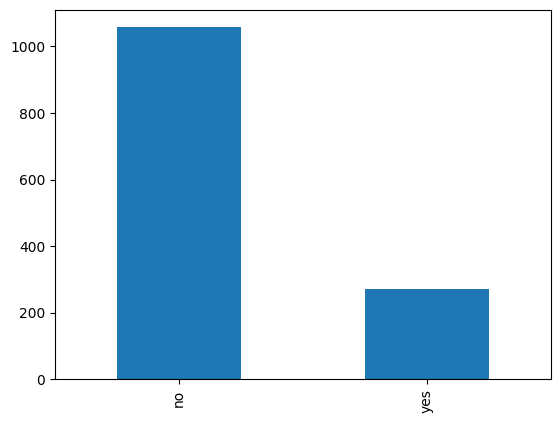

In [ ]:
df_clean['smoker'].value_counts().plot(kind = 'bar')

#Bi-variate Analysis Num vs Num


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   object 
 2   bmi       1328 non-null   float64
 3   children  1328 non-null   int64  
 4   smoker    1328 non-null   object 
 5   region    1328 non-null   object 
 6   charges   1328 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.0+ KB


### Analysis Relationship between Age and Charges Feature  - [Numerical Vs Numerical]

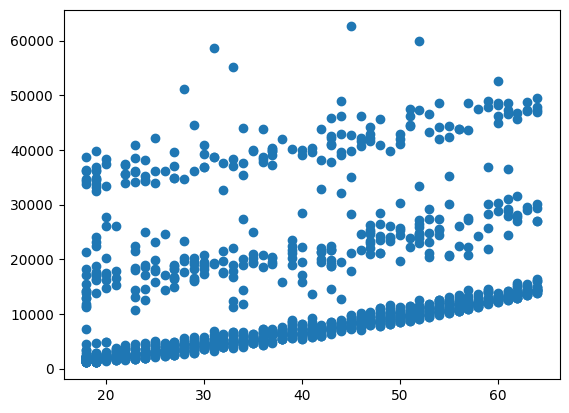

In [ ]:
plt.scatter(x=df_clean['age'],y=df_clean['charges'])
plt.show()


Here, there is positive relation between age and charges columns i.e when person age increase charges also increase.

###Analysis Relationship between bmi and Charges - [Numerical Vs Numerical]

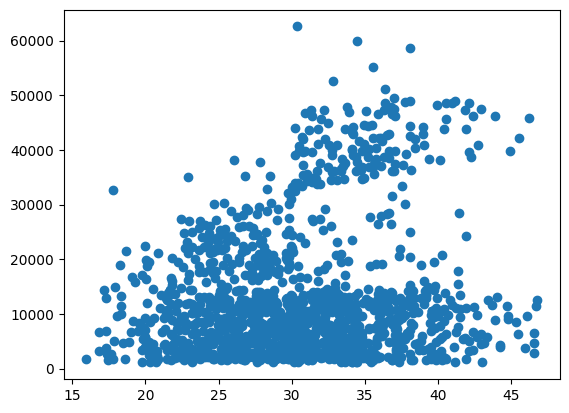

In [ ]:
plt.scatter(x=df_clean['bmi'],y=df_clean['charges'])
plt.show()

-- There is no relationship between bmi and charges

###Analysis Relationship between children and Charges - [Numerical Vs Numerical]

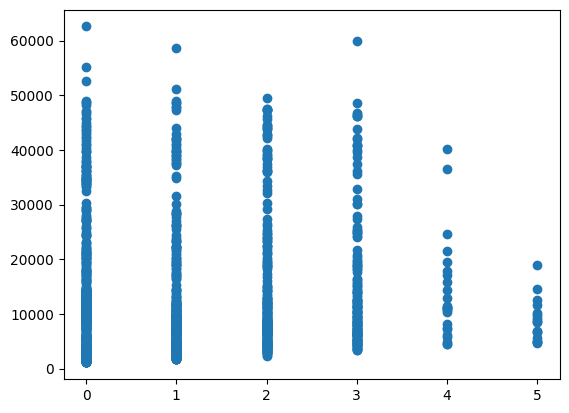

In [ ]:
plt.scatter(x=df_clean['children'],y=df_clean['charges'])
plt.show()

-- There is no relationship Between Children and charges

###Analysis Relationship between sex and Charges - [Categorical Vs Numerical]

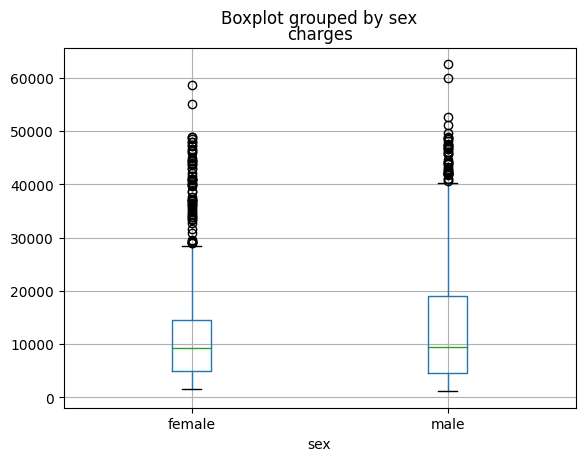

In [ ]:
df_clean.boxplot(by='sex', column='charges')
plt.show()

-- There is no relationship between sex and charges

###Analysis Relationship between smoker and Charges - [Categorical Vs Numerical]

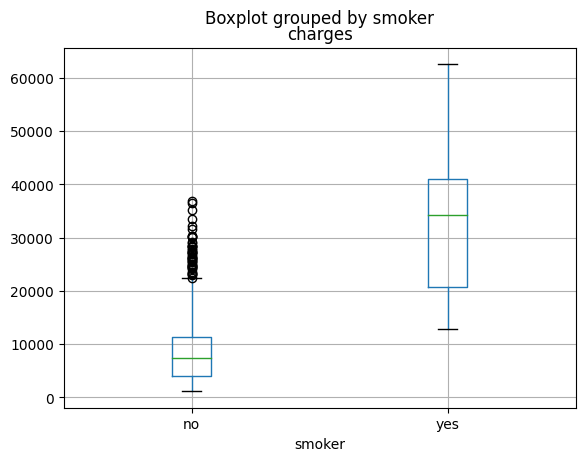

In [ ]:
df_clean.boxplot(by='smoker', column='charges')
plt.show()

here in ths box plot we observed that who smokes, will get more charged

###Analysis Relationship between region and Charges - [Categorical Vs Numerical]

<Axes: title={'center': 'charges'}, xlabel='region'>

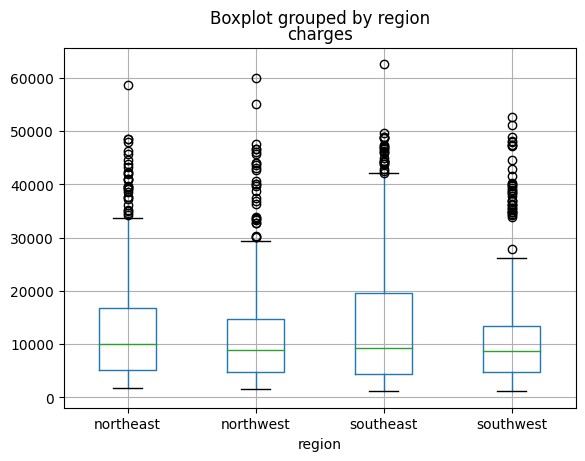

In [ ]:
df_clean.boxplot(by='region', column='charges')

 There is no relationship between region and charges, Compare to all other regions,southeast region has more charges. as most of the members used charges between 10,000 to 20,000.

### Analysis Relationship between sex and smoker- [Categorical Vs Categorical]

In [ ]:
df_male=df_clean[df_clean["sex"] == "male"]["smoker"].value_counts()

TypeError: ignored

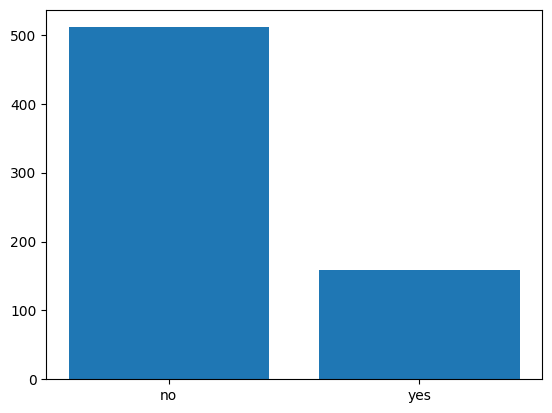

In [ ]:
fig, ax= plt.subplots()
ax.bar(df_male.index,df_male.values)
ax.set_xlabel()
plt.show()

 From above plot show that the majority of the males are non smoker.

### Conclusions:

->'Age'-Age  as strong impact on charge,older individuals to have higher chargers compared to younger one.
->'smoker'- smoker as strong impact on charges, smoker have the higher chargers compared to non_smokers.
->'sex'- chargers doesn't make big different between males and females.
->'BMI'- their is no relationship between bmi and charges.
->'regions'-- There are no significant regional(northeast, southeast, southwest, northwest)  variations The average charges or     the distribution of charges across different regions is almost similar.Compare to others,southeast region consumes high range   of charges.
->'children' -- cildren feature having no Impact on charges.

### **Recommendations:**

->As per the EDA anlaysis the insurance company should focus the cusotmer who have more dependents, and capture the business
by targeting the people who are in the age group of 24 to 40 as this is their earning stage. And create Awareness about the
Health Insurance by campaigns.
->And the insurance company should also focus on the good Salaried customer Segments in their initial stages of earnings by
telling that as the " Age " increases the risk factor,spendings,and other liabilities also increases,so bring awareness about
risk factors of "Age", so that insurance companies could capture good amounts of business and Cusotmer's Trust as well.
->Apart form this we could also improve the business numbers by targetting the smoker's based on the risk factor of they smoke daily,
because as per EDA smoker's need to pay the more charges as compared to non smokers, there is risk factor but in the market the
premium(charges) are more, if we put some competitive charges for the smoker's as compared to other insurance companies,
that would definetly make good amounts of profits and referrals as well..

**SPRINT 2 - Data Preparation and Model Building**


**Problem Statement**
 - The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.

ML Framework:

In [ ]:
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df_clean.shape

(1328, 7)

###Identify the input and output/target variables.


In [ ]:
df_clean.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df_clean.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#here X is input variable and y is indicate target varibale ...
X=df_clean[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df_clean['charges']

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


From the above  dataset the target variable data is avialable , then it come under supervised  learning ,and target variable is real and continue,then task is Regression
TYPE : Supervised
Task : Regression


**Split the dataset into Training and Testing (recommended 75:25 split).**

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test =train_test_split(X,y,train_size=0.75,random_state=100)


In [ ]:
X_train.head()


,age,sex,bmi,children,smoker,region
1030,46,female,23.655,1,yes,northwest
1140,50,male,37.070,1,no,southeast
1220,30,female,21.945,1,no,northeast
51,21,female,33.630,2,no,northwest
206,59,male,26.400,0,no,southeast


In [ ]:
y_train.head()


1030    21677.28345
1140     9048.02730
1220     4718.20355
51       3579.82870
206     11743.29900
Name: charges, dtype: float64

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(996, 6) (996,)
(332, 6) (332,)


**Data preparation on train data:**


In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [ ]:
#separating the categorical and numerical
X_train_cat = X_train.select_dtypes(include = "object")
X_train_cat.head()

,sex,smoker,region
1030,female,yes,northwest
1140,male,no,southeast
1220,female,no,northeast
51,female,no,northwest
206,male,no,southeast


In [ ]:
X_train_num = X_train.select_dtypes(include =["int64","float64"])
X_train_num.head()

,age,bmi,children
1030,46,23.655,1
1140,50,37.070,1
1220,30,21.945,1
51,21,33.630,2
206,59,26.400,0


**Scaling for the Numerical Features**


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
import sklearn

In [ ]:
scalar

StandardScaler()

In [ ]:
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
1030,0.499160,-1.157548,-0.093052
1140,0.784108,1.131144,-0.093052
1220,-0.640633,-1.449286,-0.093052
51,-1.281767,0.544256,0.719928
206,1.425242,-0.689232,-0.906032


In [ ]:
X_train_num.describe()

,age,bmi,children
count,996.000000,996.000000,996.000000
mean,38.992972,30.439885,1.114458
std,14.044686,5.864372,1.230660
min,18.000000,15.960000,0.000000
25%,26.000000,26.166250,0.000000
50%,39.000000,30.205000,1.000000
75%,51.000000,34.443750,2.000000
max,64.000000,46.750000,5.000000


In [ ]:
import numpy as np
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [38.99297189 30.43988454  1.11445783]
Std of each column: [14.03763411  5.86142707  1.2300422 ]


**Applying OneHotEncoding on Categorical Columns**


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder_ = OneHotEncoder(drop='first',sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                               columns=encoder_.get_feature_names_out(X_train_cat.columns),
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1030,0.0,1.0,1.0,0.0,0.0
1140,1.0,0.0,0.0,1.0,0.0
1220,0.0,0.0,0.0,0.0,0.0
51,0.0,0.0,1.0,0.0,0.0
206,1.0,0.0,0.0,1.0,0.0


**Concatinating the Encoded Categorical Features and Rescaled Numerical Features:**


In [ ]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)

###KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
regressor=KNeighborsRegressor()
regressor.fit(X_train_transformed,y_train)

KNeighborsRegressor()

**Preparing Test Data**

In [ ]:
X_test.head()


,age,sex,bmi,children,smoker,region
1289,44,male,34.32,1,no,southeast
836,36,male,31.50,0,no,southwest
971,34,female,23.56,0,no,northeast
355,46,male,27.60,0,no,southwest
965,35,male,27.10,1,no,southwest


In [ ]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1289 to 613
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       332 non-null    int64  
 1   sex       332 non-null    object 
 2   bmi       332 non-null    float64
 3   children  332 non-null    int64  
 4   smoker    332 non-null    object 
 5   region    332 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.2+ KB


In [ ]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()


,sex,smoker,region
1289,male,no,southeast
836,male,no,southwest
971,female,no,northeast
355,male,no,southwest
965,male,no,southwest


In [ ]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
1289,44,34.32,1
836,36,31.50,0
971,34,23.56,0
355,46,27.60,0
965,35,27.10,1


In [ ]:
#rescaling for the numerical test Data
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
1289,0.356686,0.661975,-0.093052
836,-0.213211,0.180863,-0.906032
971,-0.355685,-1.173756,-0.906032
355,0.499160,-0.484504,-0.906032
965,-0.284448,-0.569807,-0.093052


In [ ]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat),
                               columns=encoder_.get_feature_names_out(X_test_cat.columns),
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1289,1.0,0.0,0.0,1.0,0.0
836,1.0,0.0,0.0,0.0,1.0
971,0.0,0.0,0.0,0.0,0.0
355,1.0,0.0,0.0,0.0,1.0
965,1.0,0.0,0.0,0.0,1.0


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features for Test  Data

In [ ]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1289,0.356686,0.661975,-0.093052,1.0,0.0,0.0,1.0,0.0
836,-0.213211,0.180863,-0.906032,1.0,0.0,0.0,0.0,1.0
971,-0.355685,-1.173756,-0.906032,0.0,0.0,0.0,0.0,0.0
355,0.499160,-0.484504,-0.906032,1.0,0.0,0.0,0.0,1.0
965,-0.284448,-0.569807,-0.093052,1.0,0.0,0.0,0.0,1.0


**Prediction**


In [ ]:
y_test_pred = regressor.predict(X_test_transformed)


In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1289,7147.47280,7801.08726
836,4402.23300,7805.87573
971,4992.37640,4772.47667
355,24603.04837,10327.57353
965,4746.34400,5489.41800


**Evaluating the Metrics**

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  4003.4289052210843


**Analysis the Distribution plot for actual y-test and predited y_test Data  **

<Axes: xlabel='charges', ylabel='Count'>

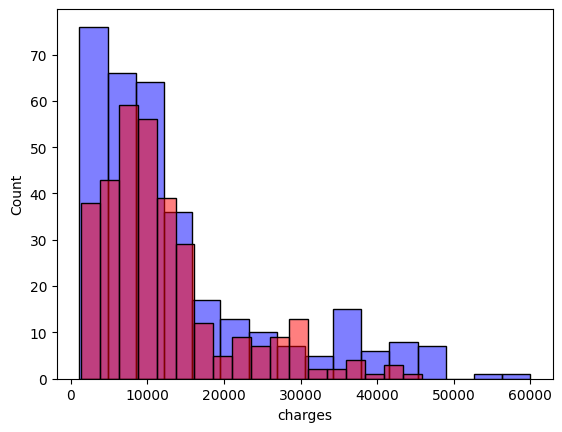

In [ ]:
import seaborn as sns
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
#perdicition
y_test_pred = regressor.predict(X_test_transformed)


In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()


,Actual,Predicted
1289,7147.47280,10731.203047
836,4402.23300,6577.240529
971,4992.37640,4969.485379
355,24603.04837,7827.546282
965,4746.34400,5295.708764


In [ ]:
#**Evaluating the Metrics**
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  4266.120018547818


<Axes: xlabel='charges', ylabel='Count'>

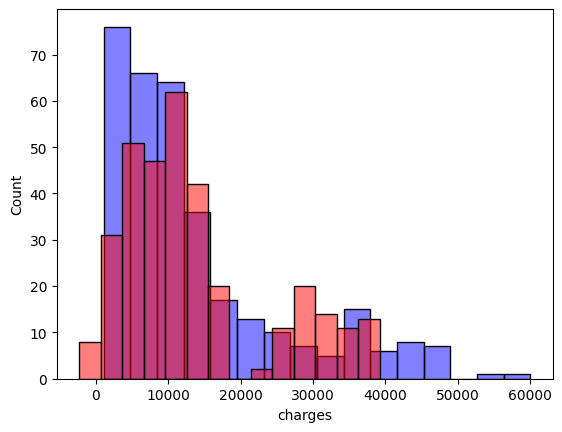

In [ ]:
##**Analysis the Distribution plot for actual y-test and predited y_test Data  **
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

**Support Vector Machines**

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

In [ ]:
#prediction
y_test_pred = regressor.predict(X_test_transformed)

In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1289,7147.47280,9204.001256
836,4402.23300,9160.746875
971,4992.37640,9153.606330
355,24603.04837,9208.556541
965,4746.34400,9149.791928


<Axes: xlabel='charges', ylabel='Count'>

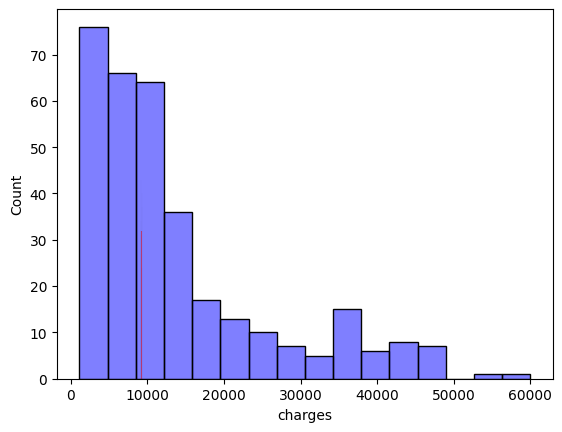

In [ ]:
##**Analysis the Distribution plot for actual y-test and predited y_test Data  **
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [ ]:
#**Evaluating the Metrics**
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  8493.57903610993


**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [ ]:
#prediction
y_test_pred = regressor.predict(X_test_transformed)

In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1289,7147.47280,7445.91800
836,4402.23300,3761.29200
971,4992.37640,4500.33925
355,24603.04837,7147.10500
965,4746.34400,4751.07000


<Axes: xlabel='charges', ylabel='Count'>

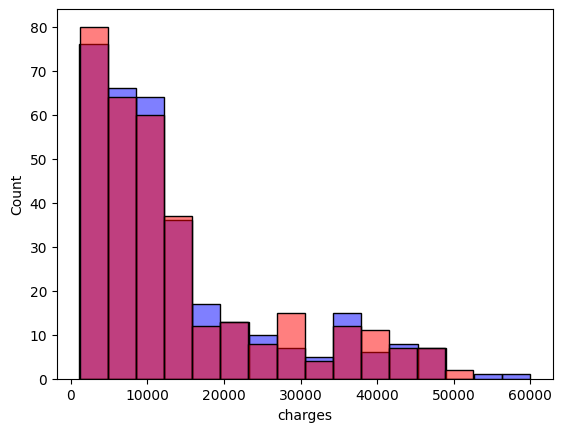

In [ ]:
#**Analysis the Distribution plot for actual y-test and predited y_test Data  **
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [ ]:
#**Evaluating the Metrics**
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))


Mean Absolute Error:  3078.3568751807225


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [ ]:
y_test_pred = regressor.predict(X_test_transformed)

In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1289,7147.47280,7927.490016
836,4402.23300,5363.982049
971,4992.37640,6585.127226
355,24603.04837,7452.772110
965,4746.34400,5992.973028


<Axes: xlabel='charges', ylabel='Count'>

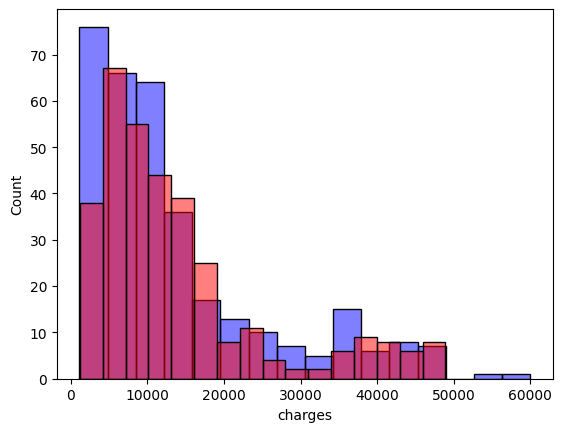

In [ ]:
#**Analysis the Distribution plot for actual y-test and predited y_test Data  **
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [ ]:
#**Evaluating the Metrics**
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  2649.0615333496785


###Conculsion

Here we concluded that Decision Tree and Random Forest Regression  are performing good rather then Liner Regression, KNN and Support Vector Machine